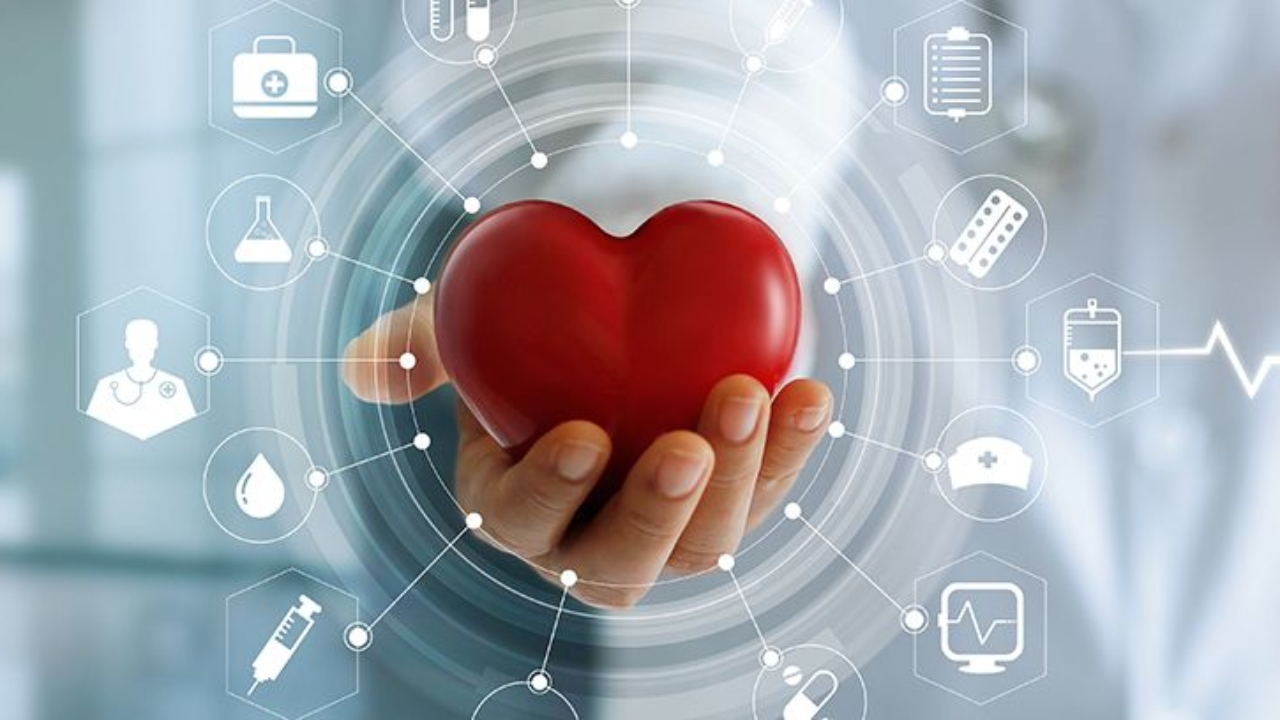

# Projet pr√©diction de la pr√©sence d'une maladie cardiaque

## Membres: 
    Clara Bustamante         
    Temirlan Ajigov
    Eric Domas                    
    C√©sar Parra


L'objectif de cette √©tude est d'utiliser les donn√©es d'un groupe de patients pr√©sentant des caract√©ristiques li√©es aux maladies cardiaques pour cr√©er un mod√®le d'apprentissage automatique permettant de pr√©dire la pr√©sence √©ventuelle d'une maladie cardiaque.

Tout d'abord nous allons charger les librairies dont nous aurons besoin pour ce projet

In [146]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lmplot
sns.set_style("white")

%matplotlib inline

Maintenant nous allons charger les donn√©es fournies pour ce projet

In [7]:
# lecture d'un fichier xcel
df = pd.read_excel('/home/cesar/Dos_IA/Projet_maladie_E_C_T_C/8e49d734-bd63-432d-814e-6c4599f33f04.xlsx')

print (df.head())

   AGE   SEXE  TDT  PAR  CHOLESTEROL  GAJ     ECG  FCMAX ANGINE  DEPRESSION   \
0   40  homme   AA  140          289    0  Normal    172    Non          0.0   
1   49  femme  DNA  160          180    0  Normal    156    Non          1.0   
2   37  homme   AA  130          283    0      ST     98    Non          0.0   
3   48  femme  ASY  138          214    0  Normal    108    Oui          1.5   
4   54  homme  DNA  150          195    0  Normal    122    Non          0.0   

       PENTE  C≈íUR  
0  Ascendant     0  
1       Plat     1  
2  Ascendant     0  
3       Plat     1  
4  Ascendant     0  


## Informations sur les attributs

    AGE : Age du patient 
    SEXE : sexe du patient [homme, femme]
    TDT : type de douleur thoracique [AT : angine typique, AA : angine atypique, DNA : douleur non angineuse, ASY : asymptomatique]
    PAR : pression art√©rielle au repos [mm Hg]
    CHOLESTEROL : cholest√©rol s√©rique [mm/dl]
    GAJ : glyc√©mie √† jeun [1 : si glyc√©mie √†  jeun > 120 mg/dl, 0 : sinon]
    ECG au repos : r√©sultats de l'√©lectrocardiogramme au repos [Normal : normal, ST : pr√©sentant une anomalie de l'onde ST-T , HVG : montrant une hypertrophie ventriculaire gauche probable]
    FCMAX : fr√©quence cardiaque maximale atteinte 
    ANGINE : angine induite par l'exercice [Oui, Non]
    DEPRESSION : Valeur num√©rique mesur√©e en d√©pression
    PENTE: la pente du segment ST d'exercice de pointe [Ascendant, Plat, Descendant]
    COEUR : maladie cardiaque[1 : Pr√©sence de la maladie, 0 : Absence de la maladie]

# Analyse exploratoire des donn√©es (EDA)

In [8]:
df.shape

(918, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  C≈íUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.describe().round(2)

AGE     PAR  CHOLESTEROL     GAJ   FCMAX  DEPRESSION     C≈íUR
count  918.00  918.00       918.00  918.00  918.00       918.00  918.00
mean    53.51  132.40       198.80    0.23  136.81         0.89    0.55
std      9.43   18.51       109.38    0.42   25.46         1.07    0.50
min     28.00    0.00         0.00    0.00   60.00        -2.60    0.00
25%     47.00  120.00       173.25    0.00  120.00         0.00    0.00
50%     54.00  130.00       223.00    0.00  138.00         0.60    1.00
75%     60.00  140.00       267.00    0.00  156.00         1.50    1.00
max     77.00  200.00       603.00    1.00  202.00         6.20    1.00

In [12]:
df.describe(include='all').round(2)

AGE   SEXE  TDT     PAR  CHOLESTEROL     GAJ     ECG   FCMAX  \
count   918.00    918  918  918.00       918.00  918.00     918  918.00   
unique     NaN      2    4     NaN          NaN     NaN       3     NaN   
top        NaN  homme  ASY     NaN          NaN     NaN  Normal     NaN   
freq       NaN    725  496     NaN          NaN     NaN     552     NaN   
mean     53.51    NaN  NaN  132.40       198.80    0.23     NaN  136.81   
std       9.43    NaN  NaN   18.51       109.38    0.42     NaN   25.46   
min      28.00    NaN  NaN    0.00         0.00    0.00     NaN   60.00   
25%      47.00    NaN  NaN  120.00       173.25    0.00     NaN  120.00   
50%      54.00    NaN  NaN  130.00       223.00    0.00     NaN  138.00   
75%      60.00    NaN  NaN  140.00       267.00    0.00     NaN  156.00   
max      77.00    NaN  NaN  200.00       603.00    1.00     NaN  202.00   

       ANGINE  DEPRESSION  PENTE    C≈íUR  
count     918       918.00   918  918.00  
unique      2          NaN     3     NaN  
top       Non          NaN  Plat     NaN  
freq      547          NaN   460     NaN  
mean      NaN         0.89   NaN    0.55  
std       NaN         1.07   NaN    0.50  
min       NaN        -2.60   NaN    0.00  
25%       NaN         0.00   NaN    0.00  
50%       NaN         0.60   NaN    1.00  
75%       NaN         1.50   NaN    1.00  
max       NaN         6.20   NaN    1.00

On peut repr√©senter graphiquement la matrice de corr√©lation entre les diff√©rentes caract√©ristiques

<AxesSubplot:>

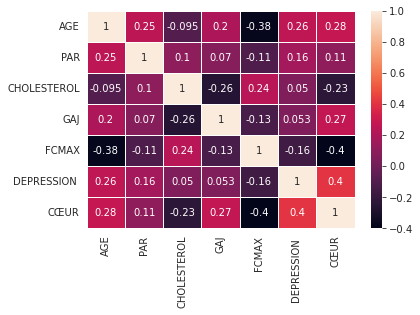

In [15]:
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

Une des choses que nous pouvons observer ici est qu'il existe une corr√©lation n√©gative entre la pr√©sentation ou non d'une maladie cardiaque et la fr√©quence cardiaque maximale atteinte, dans ce cas cela signifie que les personnes de cet √©chantillon qui ont une faible fr√©quence cardiaque maximale atteinte sont plus susceptibles de pr√©senter une maladie cardiaque.

√Ä ce stade, nous avons d√©cid√© d'utiliser pandas_profiling qui donne un tr√®s bon r√©sum√© des caract√©ristiques et des corr√©lations de nos donn√©es.

In [ ]:
import pandas_profiling
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file("maladie_2.html")

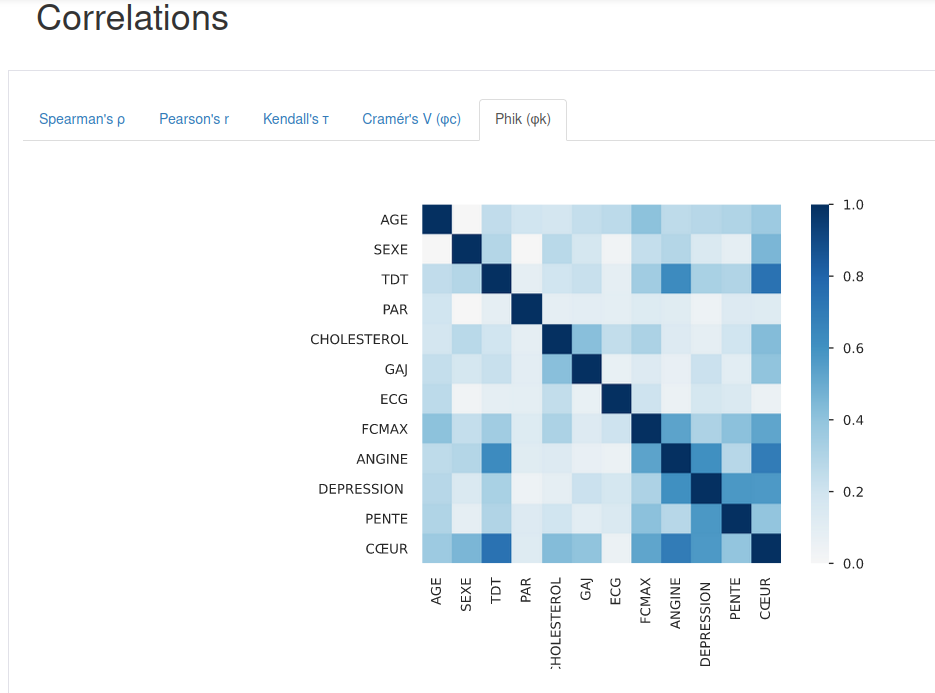

En observant la matrice de corr√©lation Phik, nous pouvons voir qu'il existe une corr√©lation entre la pr√©sence ou l'absence de maladie cardiaque et d'autres caract√©ristiques, principalement entre : TDT, FCMAX, ANGINE, DEPRESION et PENTE

## Visualisation des donn√©es

Apr√®s avoir compar√© diff√©rents attributs entre eux, nous obtenons les r√©sultats utiles suivants.

DEPRESSION = Valeur num√©rique mesur√©e en d√©pression

Apparemment, les personnes souffrant d'une maladie cardiaque ont un niveau de d√©pression plus √©lev√©

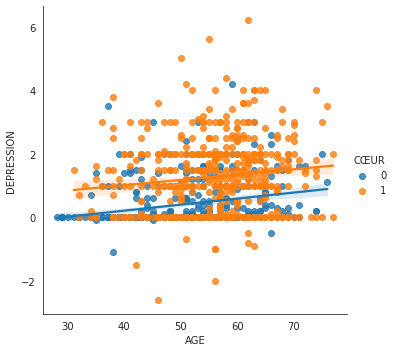

In [18]:
lmplot(x="AGE", y="DEPRESSION ", hue="C≈íUR", data=df)

CHOLESTEROL = Cholest√©rol s√©rique [mm/dl]

Ici on peut observer une concentration de personnes atteintes de la maladie entre 45 et 70 ans et avec un cholest√©rol entre 200 et 500 mm/dl

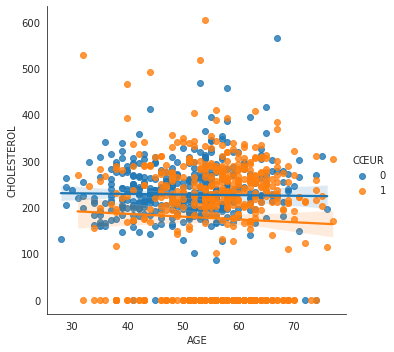

In [20]:
lmplot(x="AGE", y="CHOLESTEROL", hue="C≈íUR", data=df)

FCMAX = Fr√©quence cardiaque maximale atteinte

Ici, nous pouvons voir la corr√©lation n√©gative entre la fr√©quence cardiaque maximale atteinte et la maladie, il y a une plus grande concentration de personnes malades √† mesure que la fr√©quence cardiaque maximale diminue

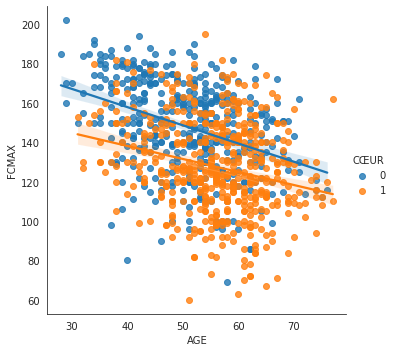

In [21]:
lmplot(x="AGE", y="FCMAX", hue="C≈íUR", data=df)

Nous allons tester avec un ACP (Analyse en Composantes Principales) pour voir si nous pouvons g√©n√©rer un mod√®le de Machine Learning √† partir de l√†, pour eux il faudra transformer les colonnes de cat√©gorie de notre dataframe en nombres

Source:

https://towardsdatascience.com/how-to-encode-categorical-columns-using-python-9af10b36f049

# Pre-processing

S√©parons le bloc de donn√©es en fonction de leur type de donn√©es.

In [23]:
df_numeric = df[['AGE', 'PAR', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'DEPRESSION ', 'C≈íUR']]
df_numeric.head()

AGE  PAR  CHOLESTEROL  GAJ  FCMAX  DEPRESSION   C≈íUR
0   40  140          289    0    172          0.0     0
1   49  160          180    0    156          1.0     1
2   37  130          283    0     98          0.0     0
3   48  138          214    0    108          1.5     1
4   54  150          195    0    122          0.0     0

In [24]:
df_categorical = df[['SEXE', 'TDT', 'ECG', 'ANGINE', 'PENTE']]
df_categorical.head()

SEXE  TDT     ECG ANGINE      PENTE
0  homme   AA  Normal    Non  Ascendant
1  femme  DNA  Normal    Non       Plat
2  homme   AA      ST    Non  Ascendant
3  femme  ASY  Normal    Oui       Plat
4  homme  DNA  Normal    Non  Ascendant

Apr√®s avoir s√©par√© le bloc de donn√©es, v√©rifions les valeurs uniques pour chaque colonne. Vous pouvez utiliser la m√©thode .unique pour r√©cup√©rer les valeurs distinctes sur une colonne.


In [26]:
df['SEXE'].unique()

array(['homme', 'femme'], dtype=object)

In [27]:
df['TDT'].unique()

array(['AA', 'DNA', 'ASY', 'AT'], dtype=object)

In [28]:
df['ECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [29]:
df['ANGINE'].unique()

array(['Non', 'Oui'], dtype=object)

In [30]:
df['PENTE'].unique()

array(['Ascendant', 'Plat', 'Descendant'], dtype=object)

## Encoder les √©tiquettes

Nous utiliserons la fonction appel√©e .get_dummies de la biblioth√®que pandas pour faire cela.


In [31]:
df_categorical_encoded = pd.get_dummies(df_categorical)
df_categorical_encoded.head()

SEXE_femme  SEXE_homme  TDT_AA  TDT_ASY  TDT_AT  TDT_DNA  ECG_LVH  \
0           0           1       1        0       0        0        0   
1           1           0       0        0       0        1        0   
2           0           1       1        0       0        0        0   
3           1           0       0        1       0        0        0   
4           0           1       0        0       0        1        0   

   ECG_Normal  ECG_ST  ANGINE_Non  ANGINE_Oui  PENTE_Ascendant  \
0           1       0           1           0                1   
1           1       0           1           0                0   
2           0       1           1           0                1   
3           1       0           0           1                0   
4           1       0           1           0                1   

   PENTE_Descendant  PENTE_Plat  
0                 0           0  
1                 0           1  
2                 0           0  
3                 0           1  
4                 0           0

Maintenant, combinons-les avec les colonnes num√©riques :

In [32]:
df_c = pd.concat([df_numeric, df_categorical_encoded], axis=1)
df_c.head()

AGE  PAR  CHOLESTEROL  GAJ  FCMAX  DEPRESSION   C≈íUR  SEXE_femme  \
0   40  140          289    0    172          0.0     0           0   
1   49  160          180    0    156          1.0     1           1   
2   37  130          283    0     98          0.0     0           0   
3   48  138          214    0    108          1.5     1           1   
4   54  150          195    0    122          0.0     0           0   

   SEXE_homme  TDT_AA  ...  TDT_AT  TDT_DNA  ECG_LVH  ECG_Normal  ECG_ST  \
0           1       1  ...       0        0        0           1       0   
1           0       0  ...       0        1        0           1       0   
2           1       1  ...       0        0        0           0       1   
3           0       0  ...       0        0        0           1       0   
4           1       0  ...       0        1        0           1       0   

   ANGINE_Non  ANGINE_Oui  PENTE_Ascendant  PENTE_Descendant  PENTE_Plat  
0           1           0                1                 0           0  
1           1           0                0                 0           1  
2           1           0                1                 0           0  
3           0           1                0                 0           1  
4           1           0                1                 0           0  

[5 rows x 21 columns]

In [35]:
df_c = df_c[['AGE', 'PAR', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'DEPRESSION ',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui',
       'PENTE_Ascendant', 'PENTE_Descendant', 'PENTE_Plat', 'C≈íUR']]

## ACP

√âtant donn√© que toutes nos colonnes sont num√©riquement, nous pouvons proc√©der √† une analyse ACP

Dans ce cas, nous souhaitons pr√©dire √† partir des donn√©es existantes si un nouveau patient pr√©sentant certaines caract√©ristiques pr√©sentera ou non une pathologie cardiaque. Nous utiliserons donc toutes les colonnes de notre dataframe, √† l'exception de la derni√®re, o√π se trouve l'information indiquant si la personne est malade ou non.

In [42]:
from sklearn.decomposition import PCA
#from sklearn.preprocessing import scale

In [39]:
df_c.columns[:20]

Index(['AGE', 'PAR', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'DEPRESSION ',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui',
       'PENTE_Ascendant', 'PENTE_Descendant', 'PENTE_Plat'],
      dtype='object')

In [43]:
pca = PCA()
pca.fit(scale(df_c[df_c.columns[:20]]))

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.46328801e+00 2.03424582e+00 1.82031371e+00 1.44484668e+00
 1.43111962e+00 1.29457088e+00 1.20965366e+00 1.13959944e+00
 1.02237065e+00 9.02181866e-01 8.29002416e-01 8.05702418e-01
 6.30545785e-01 5.55007252e-01 4.39362042e-01 1.52382949e-31
 5.88054419e-32 3.62315801e-32 3.22436991e-32 1.06263283e-32]
[2.22921302e-01 1.01601493e-01 9.09165398e-02 7.21636385e-02
 7.14780335e-02 6.46580338e-02 6.04167980e-02 5.69179022e-02
 5.10628477e-02 4.50599549e-02 4.14049681e-02 4.02412373e-02
 3.14929458e-02 2.77201335e-02 2.19441717e-02 7.61084771e-33
 2.93706919e-33 1.80960561e-33 1.61042876e-33 5.30737638e-34]


Bien √©videmment, il est possible (et pr√©f√©rable) de faire un tableau r√©capitulatif, avec les valeurs propres, les proportions de variance expliqu√©e simples et cumul√©es. 

In [44]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(20)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliqu√©e" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliqu√©e" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliqu√©e", "% cum. var. expliqu√©e"]
)

eig

Dimension  Valeur propre  % variance expliqu√©e  % cum. var. expliqu√©e
0       Dim1   4.463288e+00                  22.0                   22.0
1       Dim2   2.034246e+00                  10.0                   32.0
2       Dim3   1.820314e+00                   9.0                   42.0
3       Dim4   1.444847e+00                   7.0                   49.0
4       Dim5   1.431120e+00                   7.0                   56.0
5       Dim6   1.294571e+00                   6.0                   62.0
6       Dim7   1.209654e+00                   6.0                   68.0
7       Dim8   1.139599e+00                   6.0                   74.0
8       Dim9   1.022371e+00                   5.0                   79.0
9      Dim10   9.021819e-01                   5.0                   84.0
10     Dim11   8.290024e-01                   4.0                   88.0
11     Dim12   8.057024e-01                   4.0                   92.0
12     Dim13   6.305458e-01                   3.0                   95.0
13     Dim14   5.550073e-01                   3.0                   98.0
14     Dim15   4.393620e-01                   2.0                  100.0
15     Dim16   1.523829e-31                   0.0                  100.0
16     Dim17   5.880544e-32                   0.0                  100.0
17     Dim18   3.623158e-32                   0.0                  100.0
18     Dim19   3.224370e-32                   0.0                  100.0
19     Dim20   1.062633e-32                   0.0                  100.0

Pour que cette analyse soit efficace, nous devrions √™tre en mesure d'expliquer la variance des donn√©es avec les deux premi√®res dimensions. Dans ce cas, avec ces deux premi√®res dimensions, nous ne pouvons expliquer que 32% de la variance.

https://fxjollois.github.io/cours-2016-2017/analyse-donnees-massives-tp6.html

L'id√©e est de repr√©senter graphiquement ces proportions de variances expliqu√©es (qu'on passe en pourcentage par convenance).

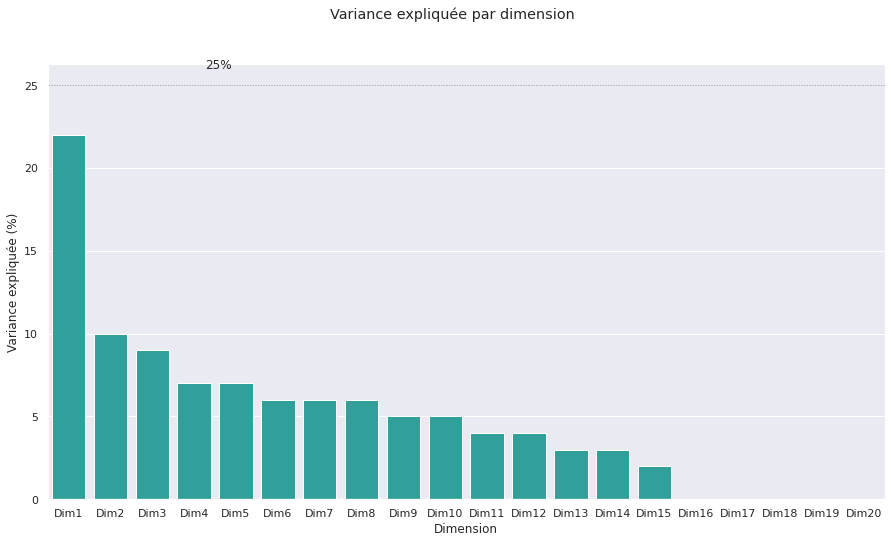

In [148]:
g_eig = seaborn.barplot(x = "Dimension", 
                y = "% variance expliqu√©e",
                palette = ["lightseagreen"],
                data = eig)
g_eig.set(ylabel = "Variance expliqu√©e (%)")
g_eig.figure.suptitle("Variance expliqu√©e par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") 
plt.text(3.25, 26, "25%")
seaborn.set(rc = {'figure.figsize':(15,20)})

In [48]:
cardio_pca = pca.transform(df_c[df_c.columns[:20]])

Afin de manipuler plus facilement l'objet obtenu par la suite, nous allons cr√©er un DataFrame pandas en ne prenant que les deux premi√®res dimensions, ainsi que la Maladie.

In [49]:
# Transformation en DataFrame pandas
cardio_pca_df = pandas.DataFrame({
    "Dim1" : cardio_pca[:,0], 
    "Dim2" : cardio_pca[:,1], 
    "Maladie" : df.C≈íUR
})

# R√©sultat (premi√®res lignes)
cardio_pca_df.head()

Dim1        Dim2  Maladie
0  54.957308  126.709057        0
1  35.133362  101.941694        1
2  34.905381  117.622039        0
3  26.075921  103.696443        1
4  27.507507  101.403207        0

/home/cesar/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Premier plan factoriel')

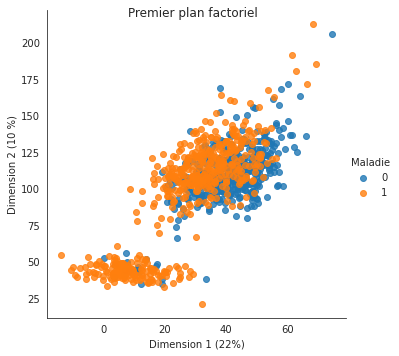

In [51]:
g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "Maladie", data = cardio_pca_df, fit_reg = False)
g_pca.set(xlabel = "Dimension 1 (22%)", ylabel = "Dimension 2 (10 %)")
g_pca.fig.suptitle("Premier plan factoriel")

Compte tenu du fait que l'ACP dans ce cas ne nous donne pas d'informations utiles, nous avons d√©cid√© d'essayer d'autres approches.

## Pre-processing deuxi√®me partie

√Ä ce stade, nous allons diviser nos donn√©es en une partie appel√©e y, qui correspond √† ce que nous voulons pr√©dire, et une autre partie appel√©e X, o√π se trouve tout le reste des donn√©es.

Nous allons travailler avec notre dataframe (df_c) qui a d√©j√† toutes ses colonnes sous forme num√©rique.

In [56]:
df_c['C≈íUR']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: C≈íUR, Length: 918, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
X = df_c[['AGE', 'PAR', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'DEPRESSION ',
       'SEXE_femme', 'SEXE_homme', 'TDT_AA', 'TDT_ASY', 'TDT_AT', 'TDT_DNA',
       'ECG_LVH', 'ECG_Normal', 'ECG_ST', 'ANGINE_Non', 'ANGINE_Oui',
       'PENTE_Ascendant', 'PENTE_Descendant', 'PENTE_Plat']]
y = df_c['C≈íUR']#.values
label_encod = LabelEncoder()
y = label_encod.fit_transform(y)
#y = LabelEncoder().fit_transform(y) # => identique
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## Construire un mod√®le

Nous allons construire un mod√®le de classificateur.

Mais avant, on va √† dividir l'ensemble des donn√©es en deux sous-ensembles : train et test.

L'importance de cette division r√©side dans le fait que pour obtenir un bon syst√®me de pr√©diction, il est n√©cessaire d'entra√Æner le mod√®le avec certaines donn√©es et, lorsqu'il est pr√™t, au moment de le tester, il faut le faire avec des donn√©es qu'il n'a pas vues auparavant (nouvelles donn√©es).

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("La longueur du dataset initial :", len(X))
print("La longueur du dataset d'entra√Ænement :", len(X_train))
print("La longueur du dataset de test :", len(X_test))

La longueur du dataset initial : 918
La longueur du dataset d'entra√Ænement : 688
La longueur du dataset de test : 230


In [58]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Maintenant que nous avons nos ensembles de donn√©es d'entra√Ænement et de test, nous pouvons essayer certains mod√®les de Machine Learning.

## Mod√®le 1 : Support Vector Machine (SVM)

Un Support Vector Machine (SVM) est un classificateur discriminatoire formellement d√©fini par un hyperplan de s√©paration. En d‚Äôautres termes, √† partir de donn√©es d‚Äôentra√Ænement √©tiquet√©es (apprentissage supervis√©), l‚Äôalgorithme produit un hyperplan optimal qui cat√©gorise les nouveaux exemples.

https://fr.wikipedia.org/wiki/Machine_%C3%A0_vecteurs_de_support

https://moncoachdata.com/blog/prediction-des-maladies-cardiaques/

In [115]:
from sklearn import svm

# Initialisation du mod√®le
svm_clf = svm.SVC(kernel ='linear')

In [116]:
# Entra√Ænement du mod√®le
svm_clf.fit(X_train,y_train)

SVC(kernel='linear')

In [117]:
# Pr√©diction avec l'ensemble des donn√©es X de test
y_pred_svm =svm_clf.predict(X_test)

## √âvaluation du mod√®le

Maintenant, nous pouvons comparer notre pr√©diction avec les donn√©es r√©elles que nous avons stock√©es comme y_test.

La pr√©cision et la matrice de confusion sont deux mesures indispensables √† l'√©valuation des mod√®les de classification.

In [118]:
y_pred_svm

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [119]:
y_test

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [120]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm

array([[ 86,  12],
       [ 20, 112]])

Repr√©sentons cette matrice graphiquement

( svm_clf est le nom que nous lui avons donn√© lorsque nous avons initialis√© notre mod√®le )

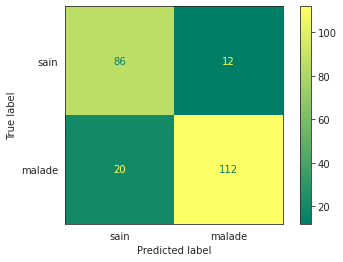

In [121]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf, X_test, y_test,
                                 display_labels=['sain', 'malade'],
                                 cmap=plt.cm.summer, # other color palettes : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
                                 normalize=None)

Nous pouvons voir ici que notre mod√®le a pr√©dit correctement 86 fois que le patient √©tait en bonne sant√© et 112 fois qu'il √©tait malade, et qu'il a manqu√© la pr√©diction 20 + 12 = 32 fois.

Et qu'en est-il de la pr√©cision ?

In [122]:
from sklearn.metrics import accuracy_score
svm_result = accuracy_score(y_test,y_pred_svm)
print("Accuracy :",svm_result)

Accuracy : 0.8608695652173913


In [69]:
print('La exactitude de la pr√©diction (accuracy) obtenue pour le mod√®le SVM est ' + str(round(svm_result*100, 2)) + ' %.')

La exactitude de la pr√©diction (accuracy) obtenue pour le mod√®le SVM est 86.09 %.


## Essayons un autre mod√®le

### k Nearest Neighbors (kNN)

En reconnaissance de formes, l‚Äôalgorithme des k-plus proches voisins (k-NN) est une m√©thode non param√©trique utilis√©e pour la classification et la r√©gression. Dans les deux cas, l‚Äôentr√©e consiste en k exemples d‚Äôentra√Ænement les plus proches dans l‚Äôespace des caract√©ristiques.
Dans la classification k-NN, la sortie est une appartenance √† une classe.

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Initialisation du mod√®le
knn_clf = KNeighborsClassifier(n_neighbors =5,n_jobs = -1,leaf_size = 60,algorithm='brute')

In [74]:
# Entra√Ænement du mod√®le
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=60, n_jobs=-1)

In [75]:
# Pr√©diction avec l'ensemble des donn√©es X de test
y_pred_knn = knn_clf.predict(X_test)
y_pred_knn

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0])

In [76]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_knn

array([[70, 28],
       [36, 96]])

In [77]:
knn_result = accuracy_score(y_test,y_pred_knn)
knn_result

0.7217391304347827

In [78]:
print('La exactitude de la pr√©diction (accuracy) obtenue pour le mod√®le KNN est ' + str(round(knn_result*100, 2)) + ' %.')

La exactitude de la pr√©diction (accuracy) obtenue pour le mod√®le KNN est 72.17 %.


Apr√®s avoir test√© ces deux mod√®les, nous avons d√©cid√© d'opter pour le premier (Support Vector Machine) car il nous a donn√© de meilleures performances (86.09 %)

## Maintenant faisons une pr√©diction en utilisant notre mod√®le SVM

Nous voudrions pr√©dire une √©ventuelle maladie cardiaque chez un nouveau patient qui vient d'arriver.



In [135]:
# Initialisation du mod√®le
svm_clf = svm.SVC(kernel ='linear', probability=True)

In [136]:
# Entra√Ænement du mod√®le
svm_clf.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [145]:
# Pr√©diction 

# AGE=50, PAR=160, CHOLESTEROL=215, GAJ=0, FCMAX=122, DEPRESSION=1.0, SEXE_femme=0, SEXE_homme=1
# TDT_AA=1, TDT_ASY=0, TDT_AT=0, TDT_DNA=0, ECG_LVH=0, ECG_Normal=1, ECG_ST=0 
# ANGINE_Non=1, ANGINE_Oui=0, PENTE_Ascendant=0, PENTE_Descendant=0, PENTE_Plat=1

prediction = svm_clf.predict([[40, 160, 215, 0, 122, 0.0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print("Pr√©diction de classe : ", prediction)

probability = svm_clf.predict_proba([[40, 160, 215, 0, 122, 0.0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1]])
print("Avec une probabilit√© de : ", probability)

Pr√©diction de classe :  [0]
Avec une probabilit√© de :  [[0.54912107 0.45087893]]


Selon ce mod√®le SVM, une personne pr√©sentant ces caract√©ristiques a une probabilit√© de 54.9 % de ne pas avoir de maladie cardiaque, la pr√©diction donne donc 0.

(0 = sain, 1 = malade)

In [71]:
print("\U0001F642")

üôÇ
